In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(['Cabin'], axis=1, inplace=True)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['TicketPrefix'] = df['Ticket'].str.extract('([A-Za-z./]+)', expand=False)
df['TicketPrefix'] = df['TicketPrefix'].fillna('None')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket'], inplace=True)

In [7]:
df = df[['PassengerId', 'Title', 'Sex', 'Age', 'FamilySize',
         'Pclass', 'Fare', 'Embarked', 'TicketPrefix', 'Survived']]
df

,PassengerId,Title,Sex,Age,FamilySize,Pclass,Fare,Embarked,TicketPrefix,Survived
0,1,Mr,male,22.0,2,3,7.2500,S,A/,0
1,2,Mrs,female,38.0,2,1,71.2833,C,PC,1
2,3,Miss,female,26.0,1,3,7.9250,S,STON/O,1
3,4,Mrs,female,35.0,2,1,53.1000,S,None,1
4,5,Mr,male,35.0,1,3,8.0500,S,None,0
...,...,...,...,...,...,...,...,...,...,...
886,887,Rev,male,27.0,1,2,13.0000,S,None,0
887,888,Miss,female,19.0,1,1,30.0000,S,None,1
888,889,Miss,female,28.0,4,3,23.4500,S,W./C.,0
889,890,Mr,male,26.0,1,1,30.0000,C,None,1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

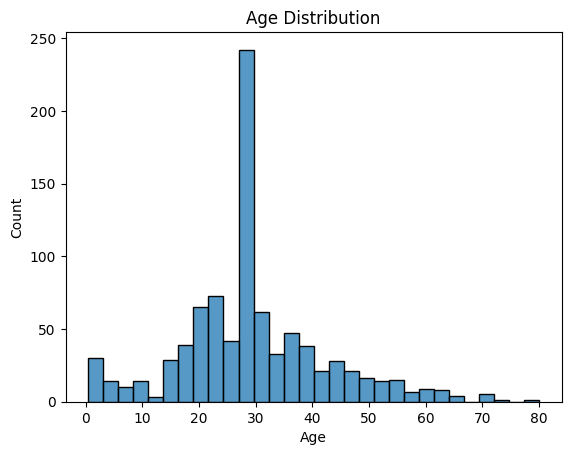

In [9]:
# Histogram for Age
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.show()

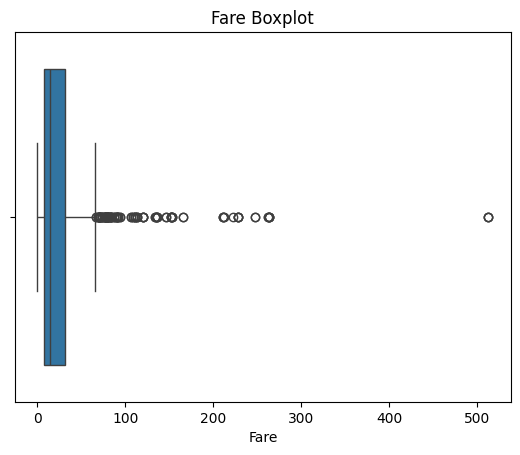

In [10]:
# Boxplot for Fare
sns.boxplot(x='Fare', data=df)
plt.title('Fare Boxplot')
plt.show()

In [11]:
# Using IQR method to clear the outlayers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

df_filtered = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

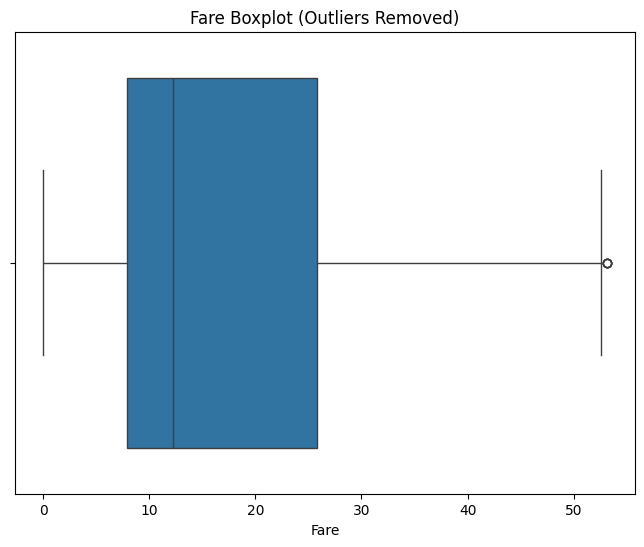

In [12]:
# Boxplot after removing the outlayers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['Fare'])
plt.title('Fare Boxplot (Outliers Removed)')
plt.xlabel('Fare')
plt.show()

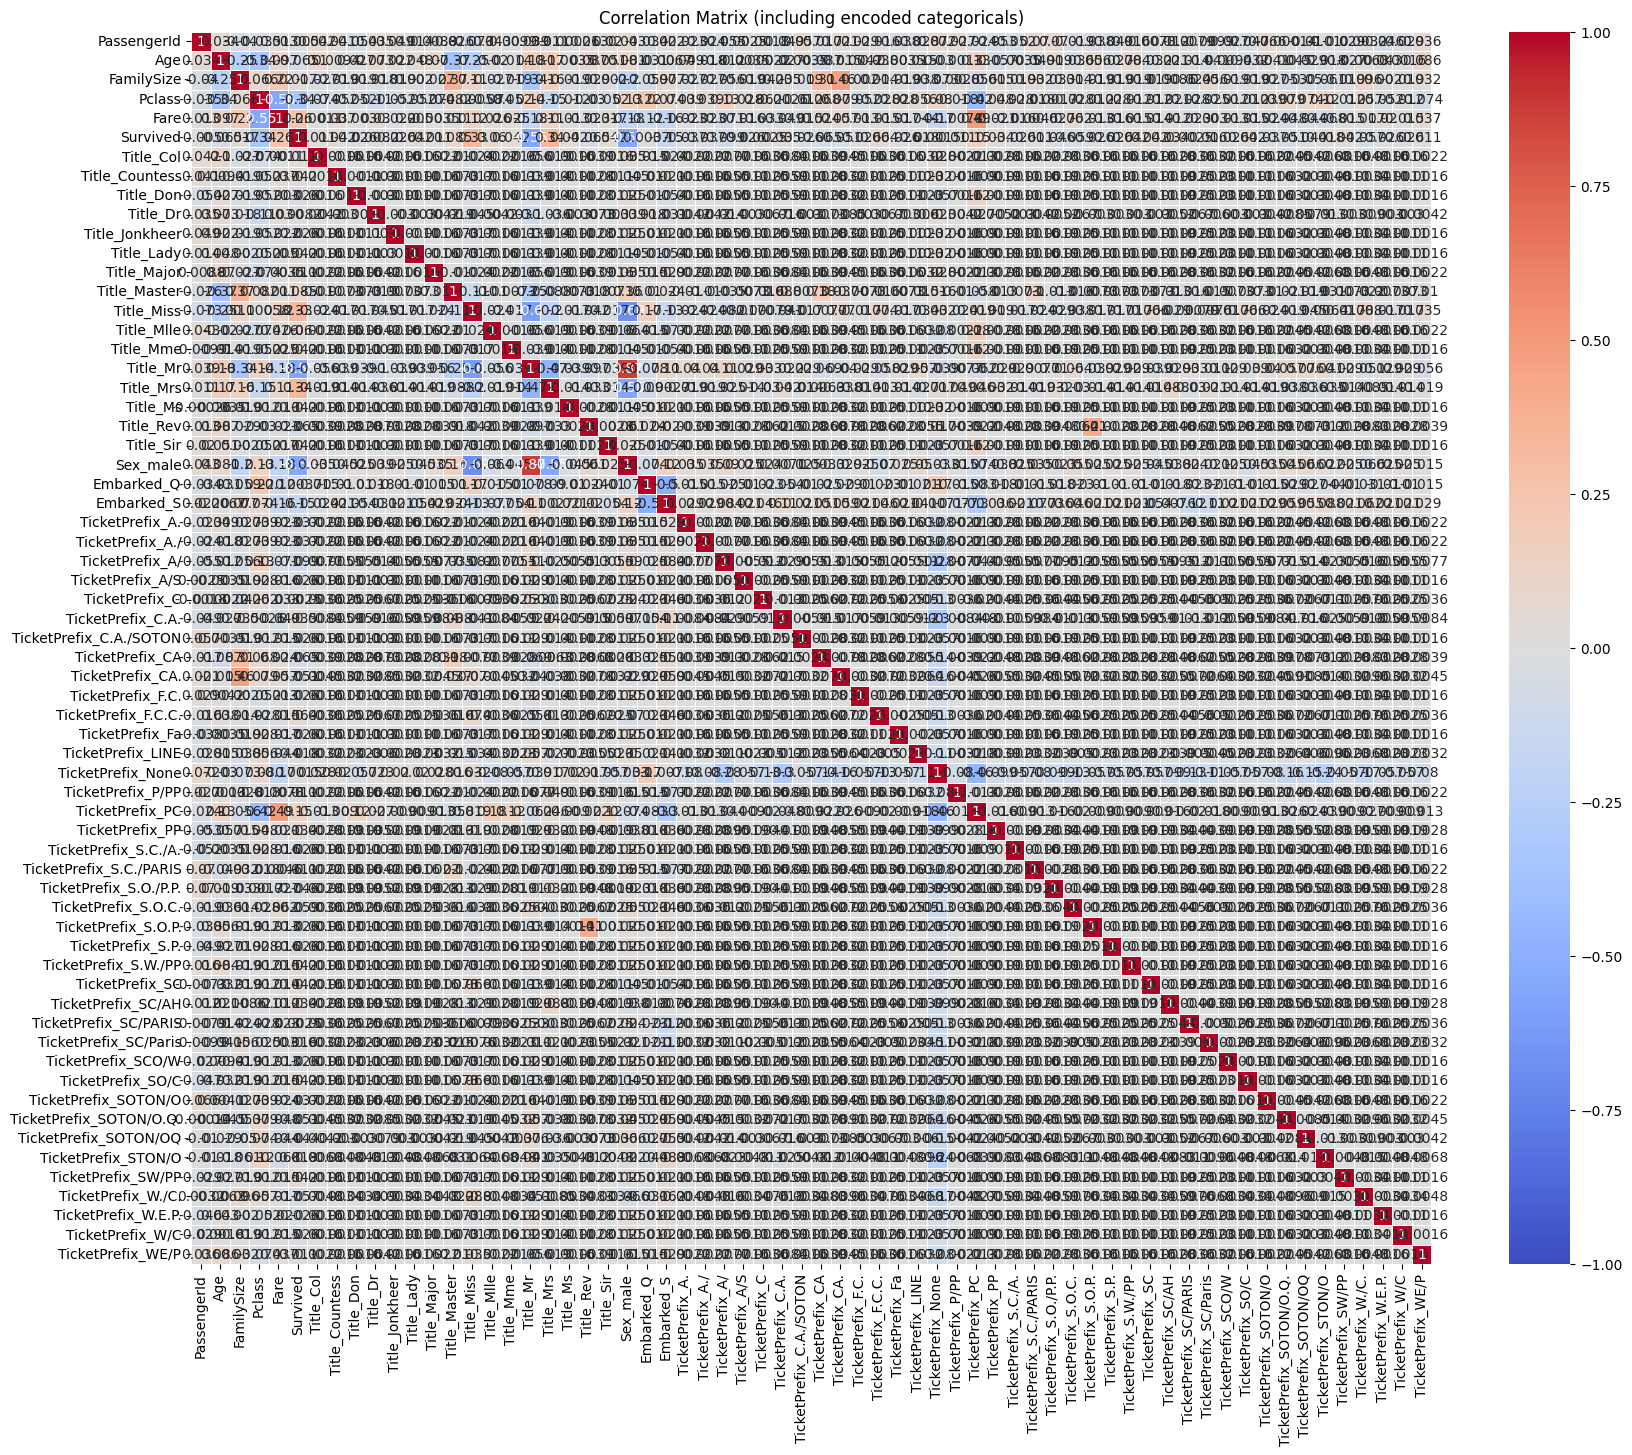

In [13]:
# Correlation matrix
# corr() - is used to calculate the correlation between the numerical columns

# which helps to create a dummies which change the category column into binary 
df_encoded = pd.get_dummies(df, drop_first=True)

# Now everything is numeric
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1, linewidths=.5)
plt.title('Correlation Matrix (including encoded categoricals)')
plt.show()

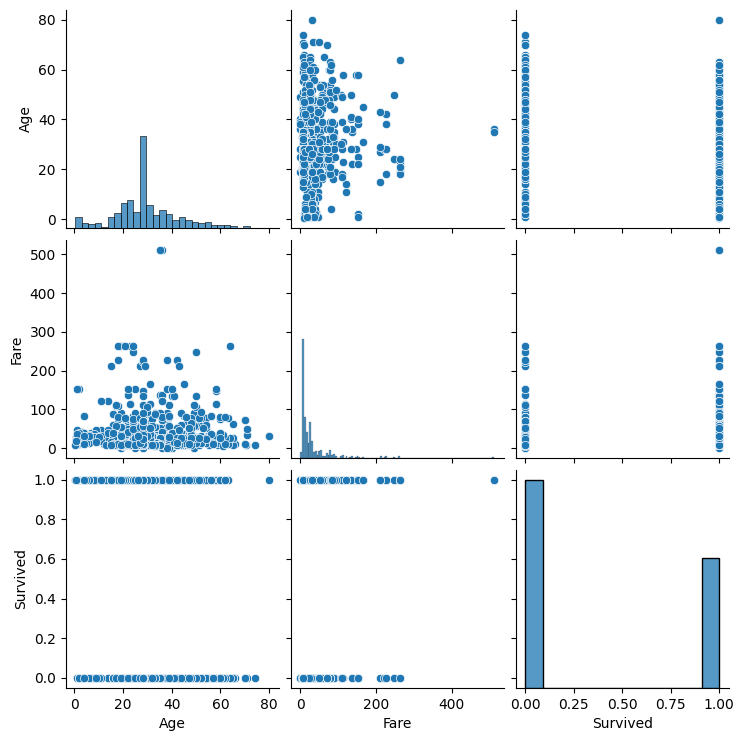

In [14]:
# Pairplot
sns.pairplot(df[['Age', 'Fare', 'Survived']].dropna())
plt.show()

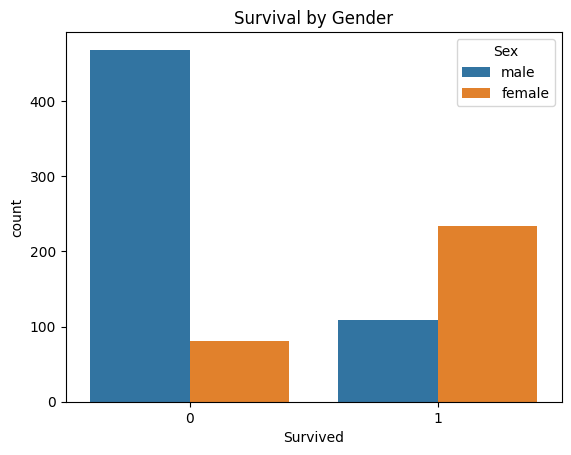

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

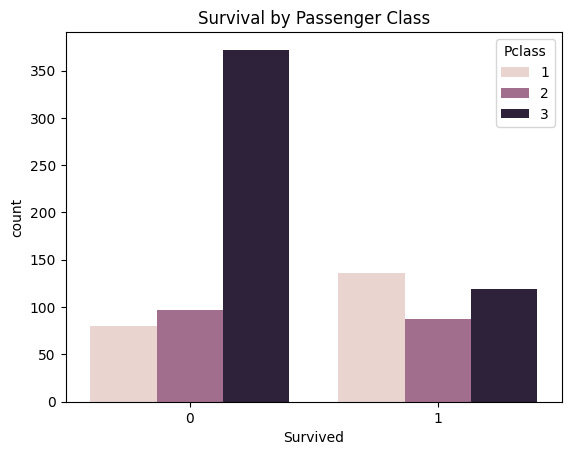

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

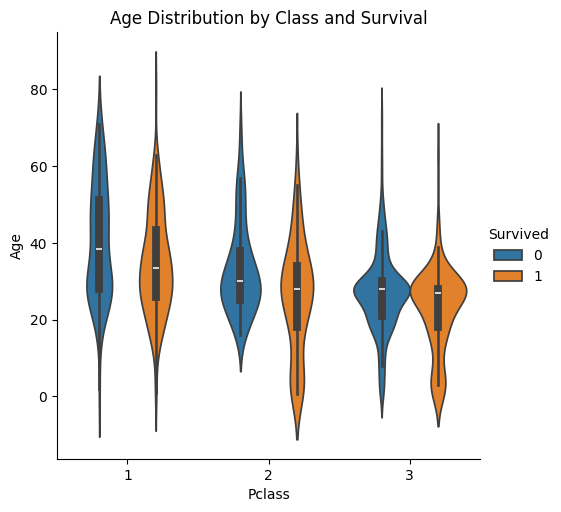

In [17]:
# Age vs Pclass vs Survival
sns.catplot(data=df, x='Pclass', y='Age', hue='Survived', kind='violin')
plt.title("Age Distribution by Class and Survival")
plt.show()

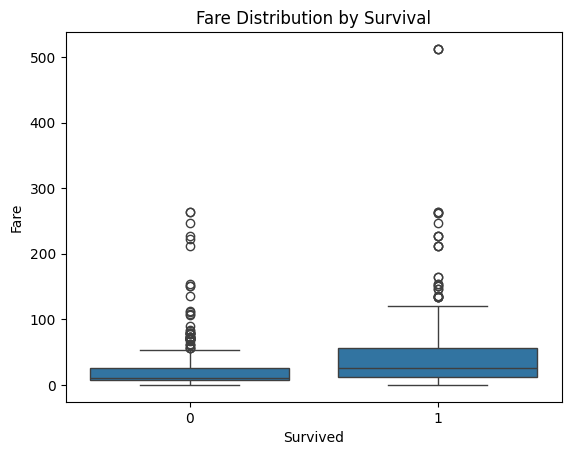

In [18]:
# Fare vs Survival
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival")
plt.show()